In [1]:
import pandas as pd
import seaborn as sns

In [2]:
#loading in the original data

df_training_og = pd.read_csv('../data/archive/train.csv')
df_testing_og = pd.read_csv('../data/archive/test.csv')

# PCA - Principal Component Analysis

In [3]:
#Start my importing the necessary library
from sklearn.decomposition import PCA

In [4]:
#Now we have to extract only the independent variables 
x_train_pca = df_training_og.iloc[:,:-2]
x_test_pca = df_testing_og.iloc[:,:-2]

In [5]:
pca = PCA(n_components = 40)

In [6]:
pca.fit(x_train_pca)

PCA(n_components=40)

In [7]:
pca.explained_variance_ratio_

array([0.6255444 , 0.04913023, 0.04121467, 0.01874956, 0.0169486 ,
       0.01272069, 0.01176685, 0.01068973, 0.0096938 , 0.00858018,
       0.00762302, 0.00672446, 0.0057942 , 0.00557881, 0.00498926,
       0.00474938, 0.004672  , 0.00431618, 0.00425715, 0.00410395,
       0.00394002, 0.00375309, 0.00352426, 0.00339359, 0.00332138,
       0.00319426, 0.00301761, 0.00291781, 0.00289566, 0.00281913,
       0.0027667 , 0.00263374, 0.00255252, 0.0023561 , 0.0023053 ,
       0.00223359, 0.00222723, 0.00209126, 0.00207687, 0.00204603])

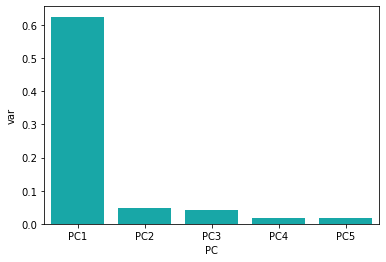

In [8]:
#only showing our top 5 components
scree_plot = pd.DataFrame({'var':pca.explained_variance_ratio_[0:5],
             'PC':['PC1','PC2','PC3','PC4','PC5']})
sns.barplot(x='PC',y="var", 
           data=scree_plot, color="c");

In [9]:
#Now we have enough components to account for over 90% of the variance of the data
sum(pca.explained_variance_ratio_)

0.9139132388207949

In [10]:
#Now let's fit our features to our pca model on both training and test sets
train_components = pca.transform(x_train_pca)
test_components = pca.transform(x_test_pca)

In [11]:
#Let's look at our pca features for training set 
pca_train_df = pd.DataFrame(data = train_components)
pca_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-5.520280,-0.290278,-1.529929,1.333242,1.425089,-0.194708,0.577454,0.691490,-1.222866,-0.363414,...,1.413105,-0.431077,-0.300903,-0.222870,1.219722,-0.387184,0.224403,0.162459,-0.281716,0.114221
1,-5.535350,-0.082530,-1.924804,0.671273,0.671260,0.735144,-0.616908,-0.771714,-0.615496,-0.895525,...,0.046214,0.104300,-0.135536,-0.474420,-0.157540,0.248820,-0.039574,0.052115,0.075519,-0.175563
2,-5.474988,0.287387,-2.144642,0.531806,0.207824,-0.037772,0.057628,0.093917,-0.063147,-0.216898,...,-0.399918,-0.031234,0.375908,0.009050,0.448845,0.568450,-0.247134,0.175307,-0.165340,-0.169643
3,-5.677232,0.897031,-2.018220,0.157125,0.759085,1.079547,-0.267805,-0.731391,0.281296,0.466269,...,0.003211,-0.198705,0.842424,0.137532,0.216647,0.037059,0.006989,0.050980,-0.242266,0.549648
4,-5.748749,1.162952,-2.139533,0.207823,0.473090,0.463035,-0.152227,-0.107509,0.289819,0.539206,...,-0.301939,0.057874,0.124936,0.311634,-0.051371,0.524159,0.254183,-0.151819,0.339568,-0.019127


In [12]:
#Now for the test set
pca_test_df = pd.DataFrame(data = test_components)
pca_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-2.686743,-1.216821,-0.722075,-0.117271,-0.546360,0.442701,-0.387679,0.327529,0.117682,-1.593977,...,0.936377,-0.230479,-0.860302,-0.361803,0.295981,0.278165,-0.578174,-0.541808,0.146741,-0.241536
1,-4.331255,-0.766327,-1.128404,-0.152942,-0.505817,0.485306,-0.423214,0.805947,0.591644,-0.986363,...,-0.239139,-0.237161,-0.792492,-0.195671,0.542325,0.245167,-0.179631,-0.211499,-0.085032,-0.110764
2,-4.985360,0.371301,-1.656858,-0.235971,-0.102938,-0.113283,-0.143993,0.279862,0.330125,-0.163722,...,-0.178452,-0.071075,0.513348,-0.362662,-0.236516,0.341733,-0.612415,-0.020657,-0.591216,0.203212
3,-5.099876,0.243743,-1.802703,0.263715,-0.050454,-0.794957,0.083771,0.650500,0.270365,0.321617,...,-0.636718,0.137732,0.496677,-0.523159,-0.368168,0.393061,-0.244917,0.144710,-0.508802,-0.009740
4,-5.023000,-0.518739,-1.871078,0.106466,0.153655,-0.947262,0.668394,0.792005,0.932680,0.593944,...,0.063505,0.089739,0.140901,-0.057620,-0.239059,0.451578,-0.436533,-0.261328,0.143540,-0.034083


In [13]:
# Before using these features to train our model, we should turn our categorical 'activity' variable to numerical

# function to convert activity to numeric
def convert_activity(activity):
    act_dict = {
        "LAYING": 1,
        "STANDING": 2,
        "SITTING": 3,
        "WALKING": 4,
        "WALKING_UPSTAIRS": 5,
        "WALKING_DOWNSTAIRS": 6
    }
    return act_dict.get(activity)

df_training_og = df_training_og.assign(
    Activity = df_training_og.get("Activity").apply(convert_activity)
)

In [14]:
#Now let's do the same for testing
df_testing_og = df_testing_og.assign(
    Activity = df_testing_og.get("Activity").apply(convert_activity)
)

In [15]:
# add the activity labels to the pca dataframes

pca_train_df = pca_train_df.assign(
    Activity = df_training_og.get("Activity")
)
pca_test_df = pca_test_df.assign(
    Activity = df_testing_og.get("Activity")
)

In [16]:
pca_train_df.to_csv(r'archive/train_pca.csv', index = False)
pca_test_df.to_csv(r'archive/test_pca.csv', index = False)